In [3]:
"""import sys
!{sys.executable} -m pip install statsmodels
"""

'import sys\n!{sys.executable} -m pip install statsmodels\n'

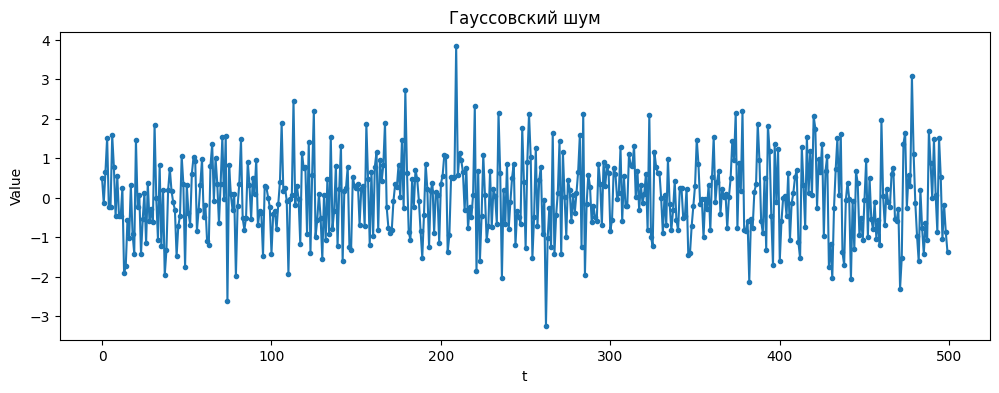

ADF Statistic: -22.343814515377062
p-value: 0.0
Ряд стационарный на уровне значимости α=0.05


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


np.random.seed(42)  
noise = np.random.normal(loc=0, scale=1, size=500)


plt.figure(figsize=(12,4))
plt.plot(noise, marker='o', linestyle='-', markersize=3)
plt.title("Гауссовский шум")
plt.xlabel("t")
plt.ylabel("Value")
plt.show()


adf_result = adfuller(noise, autolag='AIC')
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("Ряд стационарный на уровне значимости α=0.05")
else:
    print("Ряд нестационарный на уровне значимости α=0.05")


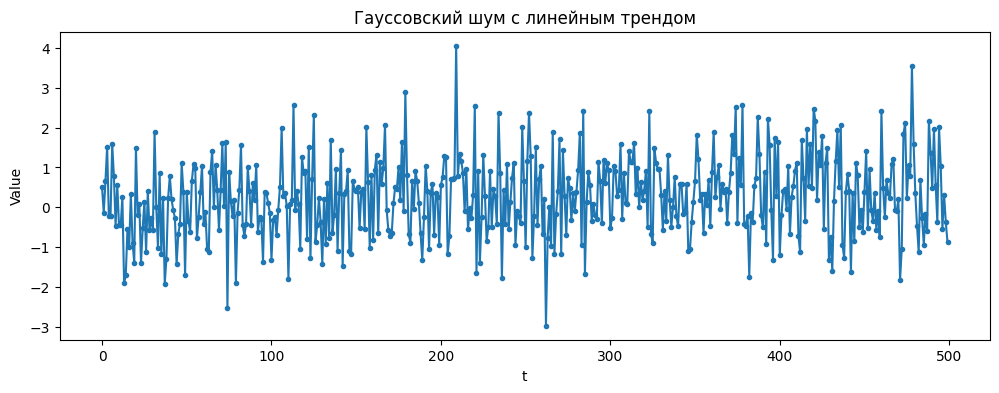

ADF Statistic (с трендом): -21.730169653751204
p-value: 0.0
Ряд стационарный на уровне значимости α=0.05


In [ ]:
t = np.arange(len(noise))
trend_series = noise + 0.001 * t


plt.figure(figsize=(12,4))
plt.plot(trend_series, marker='o', linestyle='-', markersize=3)
plt.title("Гауссовский шум с линейным трендом")
plt.xlabel("t")
plt.ylabel("Value")
plt.show()


adf_result_trend = adfuller(trend_series, autolag='AIC')
print("ADF Statistic (с трендом):", adf_result_trend[0])
print("p-value:", adf_result_trend[1])

if adf_result_trend[1] < 0.05:
    print("Ряд стационарный на уровне значимости α=0.05")
else:
    print("Ряд нестационарный на уровне значимости α=0.05")


In [ ]:
import pandas as pd


df = pd.read_csv('passengers.csv', parse_dates=['Month'], index_col='Month')
series = df['#Passengers']


n = len(series)
part1 = series[:n//3]
part2 = series[n//3:2*n//3]
part3 = series[2*n//3:]


for i, part in enumerate([part1, part2, part3], 1):
    print(f"Часть {i}: mean={part.mean():.2f}, var={part.var():.2f}")


# Если среднее и дисперсия сильно отличаются, ряд нестационарный


log_series = np.log(series)
part1_log = log_series[:n//3]
part2_log = log_series[n//3:2*n//3]
part3_log = log_series[2*n//3:]

for i, part in enumerate([part1_log, part2_log, part3_log], 1):
    print(f"Лог Часть {i}: mean={part.mean():.2f}, var={part.var():.2f}")


# Часто логарифмирование уменьшает рост дисперсии, но тренд сохраняется — ряд может оставаться нестационарным


adf_orig = adfuller(series)
print("ADF original:", adf_orig[0], "p-value:", adf_orig[1])


adf_log = adfuller(log_series)
print("ADF log:", adf_log[0], "p-value:", adf_log[1])


Часть 1: mean=158.38, var=1094.66
Часть 2: mean=269.04, var=3106.00
Часть 3: mean=413.48, var=6162.00
Лог Часть 1: mean=5.04, var=0.04
Лог Часть 2: mean=5.57, var=0.04
Лог Часть 3: mean=6.01, var=0.03
ADF original: 0.8153688792060482 p-value: 0.991880243437641
ADF log: -1.7170170891069607 p-value: 0.42236677477039125


Среднее и дисперсия растут с течением времени, ряд нестационарный.

Логарифмирование уменьшает дисперсию, но тренд остаётся, ряд всё ещё нестационарный.

DF-тест: p-value > 0.05 для обоих случаев.

In [ ]:
for reg in ['c', 'ct', 'ctt', 'n']:  
    adf_res = adfuller(series, regression=reg)
    print(f"ADF regression={reg}: statistic={adf_res[0]:.3f}, p-value={adf_res[1]:.3f}")

    adf_log_res = adfuller(log_series, regression=reg)
    print(f"ADF log regression={reg}: statistic={adf_log_res[0]:.3f}, p-value={adf_log_res[1]:.3f}\n")


ADF regression=c: statistic=0.815, p-value=0.992
ADF log regression=c: statistic=-1.717, p-value=0.422

ADF regression=ct: statistic=-2.101, p-value=0.546
ADF log regression=ct: statistic=-2.147, p-value=0.520

ADF regression=ctt: statistic=-3.234, p-value=0.196
ADF log regression=ctt: statistic=-3.219, p-value=0.202

ADF regression=n: statistic=2.391, p-value=0.997
ADF log regression=n: statistic=2.483, p-value=0.998



Ряд нестационарный относительно постоянной (константы).

P-value > 0.05 → не отвергаем нулевую гипотезу (ряд нестационарный).

Логарифм немного уменьшает дисперсию, но тренд сохраняется, ряд всё ещё нестационарный.

Тест учитывает линейный тренд.

P-value > 0.05, 
ряд нестационарный даже после учета тренда.

Логарифмирование не решает проблему тренда полностью.

Учёт квадратичного тренда делает ряд «ближе» к стационарности, но p-value всё ещё > 0.05, нулевая гипотеза не отвергается.

Значит, ряд всё ещё нестационарный, но тренд уже частично учитывается.

Без константы ряд абсолютно нестационарный (p-value ≈ 1).

Любой тренд или уровень сильно влияет на результат.